# Position estimation using multiple sessions

This notebook serves to compare the various results of estimating position using capture sessions of the same set up. 

In [16]:
# Imports
import os
import datetime
import csv
import scipy as sp
from scipy import integrate
from scipy import signal
import scipy.stats as stats
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D

In [17]:

session_uuids = [
        "0abe1a03-7278-47f6-957d-0a4bfa3cecf4",
        "2f66b9bd-4c40-43e5-98a1-ee8fe70544ea",
        "26aa8e56-b218-48e2-b91a-e67d2b7e5305",
        "44adb431-c787-4dc0-9092-f8c5144bdca4",
        "58d6bd5c-3ec7-4c25-b7db-fc798282ad65",
        "848f2dd6-9c48-4317-b570-950c8994f828",
        "b3a2c750-b6aa-4c19-8188-4187461c5714",
        "c1be71c6-9eb2-4ca8-bf6f-648de79817f5",
        "e4a4f140-5cc1-4122-b71c-296b2b79f7af",
        "f44eda6b-931e-4e0c-8e67-f73dc684e42e",
    ]

# IMU data
parent_path = os.path.abspath(os.path.join(os.getcwd(), os.pardir))

paths_to_imu_data_processed = []
timestamps = []
user_accelerations = []

for uuid in session_uuids:
    paths_to_imu_data_processed.append(
        parent_path + "/datasets/" + "session-" + uuid + "/imu_data/processed/"
    )
    timestamps.append(
        pd.read_csv(paths_to_imu_data_processed[-1] + "timestamp.csv").values
    )
    user_accelerations.append(
        pd.read_csv(paths_to_imu_data_processed[-1] + "user_acceleration.csv")
    )

In [18]:
def plot_distribution(data, key, plot_title, path_to_csv_file=None):
    """
    Gaussian distribution plots
    
    """
    size = len(data)

    # CSV writer
    if path_to_csv_file != None:
        csv_file = open(path_to_csv_file, 'w')
        writer = csv.writer(csv_file)

        # Write header
        writer.writerow([
            key[0]+"_mean", key[0] + "_std", 
            key[1]+"_mean", key[1] + "_std", 
            key[2]+"_mean", key[2] + "_std", 
        ])

    values_for_csv_file = []
    colours = ['tab:blue', 'tab:orange', 'tab:green']
    for i in range(size):
        mu, sigma = data[i].mean(), data[i].std()
        x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)         
        
        plt.plot(x, stats.norm.pdf(x, mu, sigma), color=colours[i], label=key[i])
   
        print(i, f"\t[{key[i]}] Ave: ", mu)
        print(i, f"\t[{key[i]}]  Std: ", sigma)

        values_for_csv_file.append(mu)
        values_for_csv_file.append(sigma)
    
    if path_to_csv_file != None:
        # Write mean/std values
        writer.writerow(values_for_csv_file)
        
        # Close the CSV file
        csv_file.close()

    plt.title(plot_title)
    # plt.legend()


# User acceleration vs time

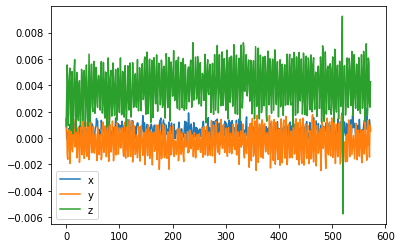

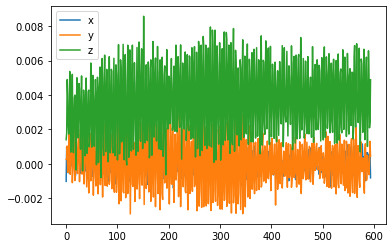

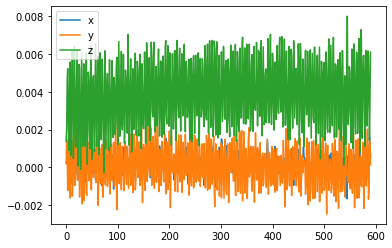

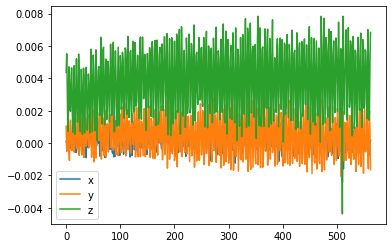

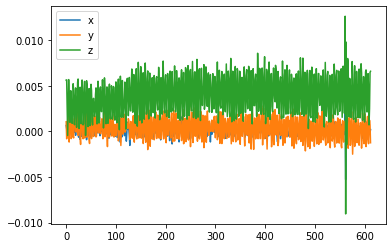

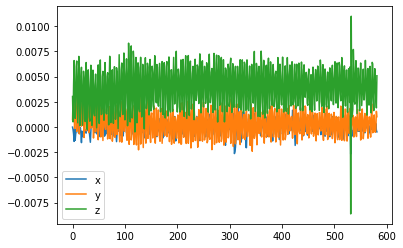

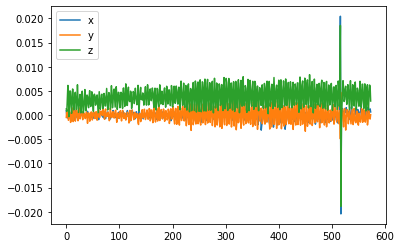

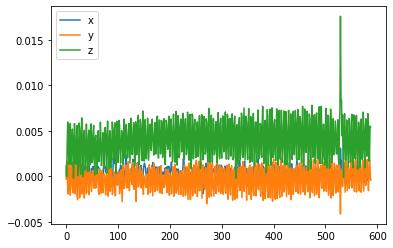

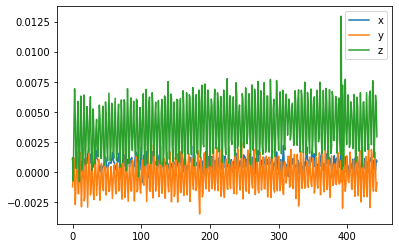

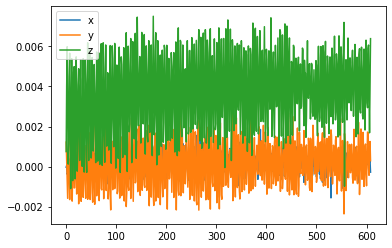

In [19]:
for acceleration in user_accelerations:
    acceleration.cumsum()
    acceleration.plot()

# Gaussian distributions of noise

0 	[x] Ave:  0.0005766383482363933
0 	[x]  Std:  0.0004945073189627839
1 	[y] Ave:  -0.0002634903321767483
1 	[y]  Std:  0.001006797750968852
2 	[z] Ave:  0.003962295737774119
2 	[z]  Std:  0.00166058071221384
0 	[x] Ave:  6.31194529382259e-05
0 	[x]  Std:  0.00047879710203064645
1 	[y] Ave:  0.0001217837473659789
1 	[y]  Std:  0.001431318057419775
2 	[z] Ave:  0.003679061678523522
2 	[z]  Std:  0.0020426034758840605
0 	[x] Ave:  0.00016089395246452688
0 	[x]  Std:  0.0004827377454747837
1 	[y] Ave:  8.855536485534974e-05
1 	[y]  Std:  0.0010892161085622135
2 	[z] Ave:  0.003907447236443485
2 	[z]  Std:  0.001756846918969401
0 	[x] Ave:  0.00010991560462298908
0 	[x]  Std:  0.0005021879777972273
1 	[y] Ave:  0.000494306988114247
1 	[y]  Std:  0.0012206592431254866
2 	[z] Ave:  0.003832097269501981
2 	[z]  Std:  0.0020027238665280347
0 	[x] Ave:  1.6881036762069947e-05
0 	[x]  Std:  0.0005496634194234358
1 	[y] Ave:  0.00039220403813031304
1 	[y]  Std:  0.0011598428275485912
2 	[z] Ave:

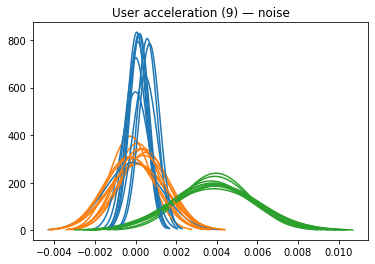

In [20]:
for i in range(len(user_accelerations)):
    # User acceleration (x, y, z)
    plot_distribution(
        data=[user_accelerations[i]['x'], user_accelerations[i]['y'], user_accelerations[i]['z']],
        key=["x", 'y', 'z'], 
        plot_title=f"User acceleration — noise", 
        path_to_csv_file=paths_to_imu_data_processed[i]+"user_acceleration_noise.csv"
    )